In [1]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch

import random
np.random.seed(42)
random.seed(42)
!pip install xgboost
!pip install catboost lightgbm
!pip install shap

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import os
os.environ['OMP_NUM_THREADS'] = '1'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.4 MB/s eta 0:00:00


In [2]:
# Importing the dataset
bank_data = pd.read_csv('churn.csv')

In [3]:
#Making copy of the dataset
bank_data2 = bank_data.copy()

# EXPLORATORY DATA ANALYSIS

In [4]:
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
bank_data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [6]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
bank_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
bank_data.shape

(10000, 14)

In [9]:
# Checking for duplicate records
bank_data.duplicated().sum()

np.int64(0)

In [10]:
# Checking for null values
bank_data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [11]:
#Dropping columns not useful for analysis
bank_data = bank_data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Display the first few rows to verify the changes
bank_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


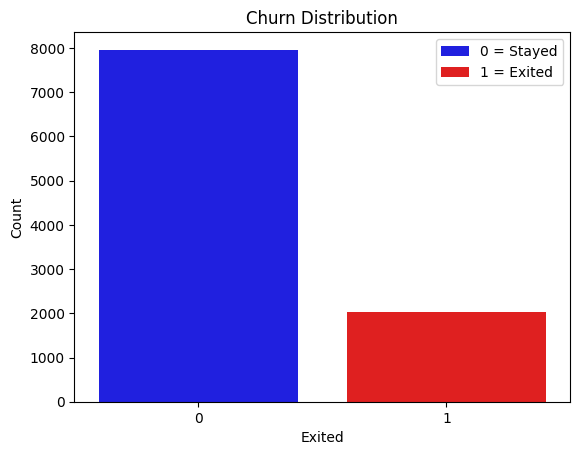

In [12]:
#checking churn distribution
sns.countplot(x=bank_data["Exited"], palette=["blue", "red"])

# Add legend to clarify what 0 and 1 mean
plt.legend(labels=['0 = Stayed', '1 = Exited'], loc='upper right')

# Add title
plt.title("Churn Distribution")
plt.xlabel("Exited")
plt.ylabel("Count")
plt.show()

In [13]:
#Calculating unique values in the target variable
print(bank_data["Exited"].value_counts())

Exited
0    7963
1    2037
Name: count, dtype: int64


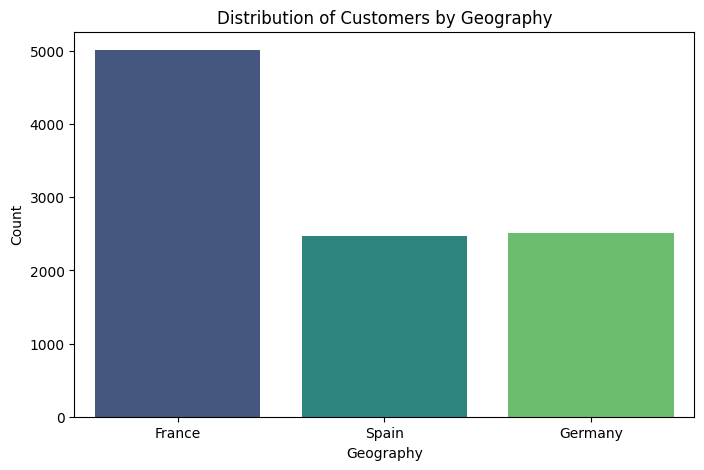

In [14]:
# Countplot for Geography distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=bank_data["Geography"], palette="viridis")

plt.title("Distribution of Customers by Geography")
plt.xlabel("Geography")
plt.ylabel("Count")
plt.show()

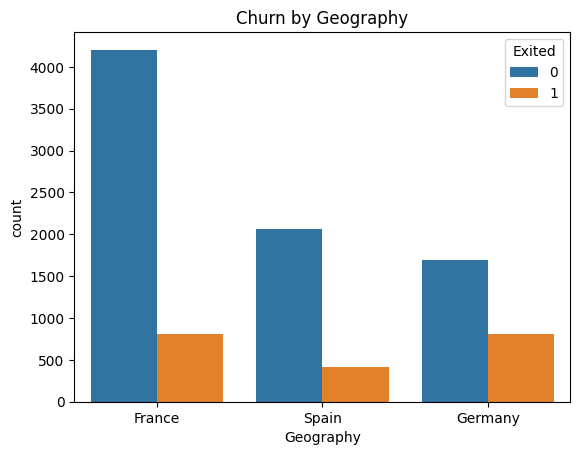

In [15]:
#distribution of churn by geography
sns.countplot(x=bank_data["Geography"], hue=bank_data["Exited"])
plt.title("Churn by Geography")
plt.show()

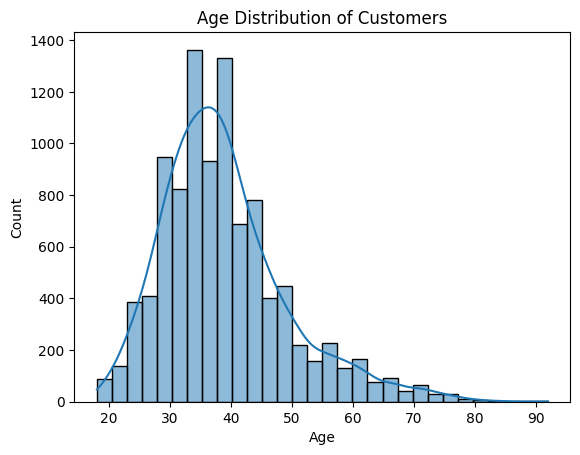

In [16]:
#Age distribution of customers
sns.histplot(bank_data["Age"], bins=30, kde=True)
plt.title("Age Distribution of Customers")
plt.show()

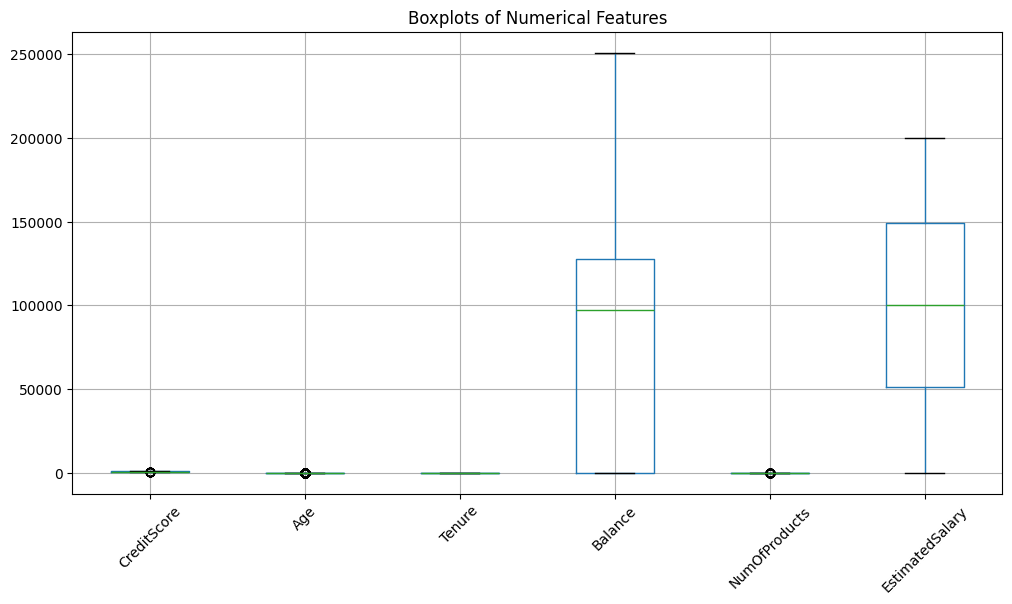

In [17]:
#Boxplots for numerical variables to detect outliers
numerical_cols = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]
bank_data[numerical_cols].boxplot(figsize=(12,6))
plt.xticks(rotation=45)
plt.title("Boxplots of Numerical Features")
plt.show()

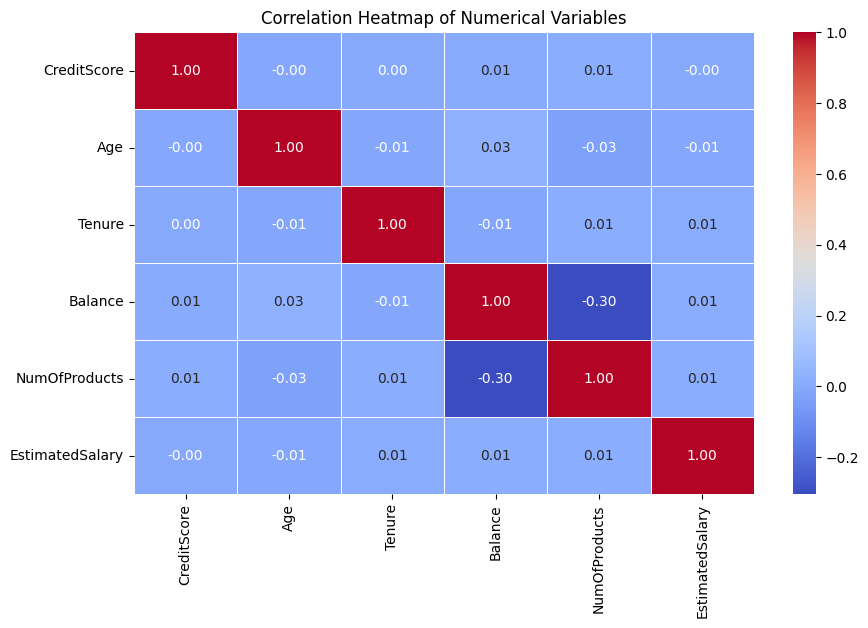

In [18]:
#Heatmap showing correlation between numerical variables
corr_matrix = bank_data[numerical_cols].corr()
# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

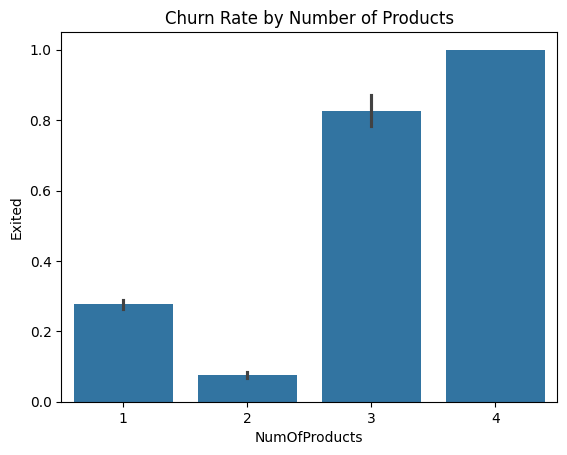

In [19]:
#Churn rate by number of products
sns.barplot(x=bank_data["NumOfProducts"], y=bank_data["Exited"])
plt.title("Churn Rate by Number of Products")
plt.show()

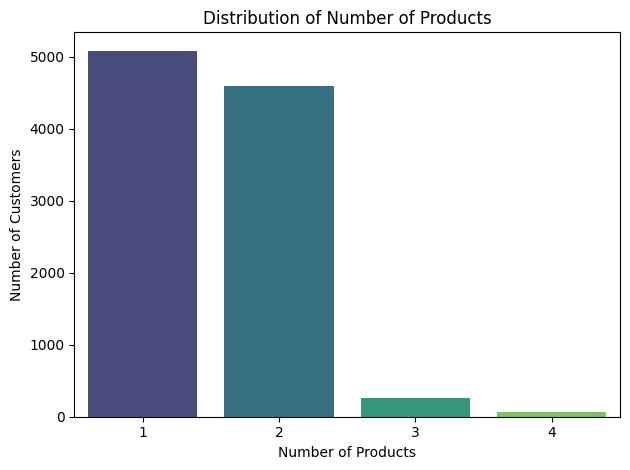

In [20]:
# Plot distribution of NumOfProducts
sns.countplot(x='NumOfProducts', data=bank_data, palette='viridis')

plt.title("Distribution of Number of Products")
plt.xlabel("Number of Products")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()

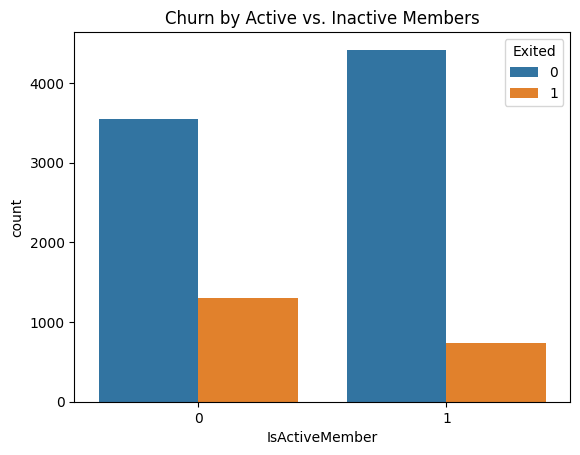

In [21]:
#Churn by activity status
sns.countplot(x=bank_data["IsActiveMember"], hue=bank_data["Exited"])
plt.title("Churn by Active vs. Inactive Members")
plt.show()

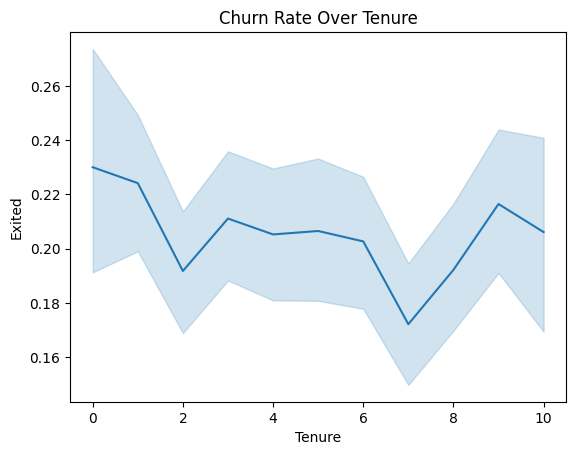

In [22]:
#churn rate by tenure
sns.lineplot(x=bank_data["Tenure"], y=bank_data["Exited"])
plt.title("Churn Rate Over Tenure")
plt.show()

# ENCODING

In [23]:
#ENCODING THE CATEGORICAL VARIABLES
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# Label Encoding for 'Gender'
label_encoder = LabelEncoder()
bank_data["Gender"] = label_encoder.fit_transform(bank_data["Gender"])  # Female = 0, Male = 1

# One-Hot Encoding for 'Geography'
one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' avoids dummy variable trap
geo_encoded = one_hot_encoder.fit_transform(bank_data[["Geography"]])

In [24]:
# Convert the encoded array into a DataFrame with proper column names
geo_encoded_df = pd.DataFrame(geo_encoded, columns=one_hot_encoder.get_feature_names_out(["Geography"]))

# Drop the original 'Geography' column and concatenate the new one-hot encoded columns
bank_data = bank_data.drop(columns=["Geography"])
bank_data = pd.concat([bank_data, geo_encoded_df], axis=1)

# Display the first few rows
bank_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,1.0


# STANDARDIZATION

In [25]:
from sklearn.preprocessing import StandardScaler
# Select features for clustering
features = ['Gender',"NumOfProducts", "IsActiveMember",'HasCrCard','CreditScore','Age','Tenure','Balance','EstimatedSalary','Geography_Germany','Geography_Spain']
X = bank_data[features]
# Standardize the features (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled

array([[-1.09598752, -0.91158349,  0.97024255, ...,  0.02188649,
        -0.57873591, -0.57380915],
       [-1.09598752, -0.91158349,  0.97024255, ...,  0.21653375,
        -0.57873591,  1.74273971],
       [-1.09598752,  2.52705662, -1.03067011, ...,  0.2406869 ,
        -0.57873591, -0.57380915],
       ...,
       [-1.09598752, -0.91158349,  0.97024255, ..., -1.00864308,
        -0.57873591, -0.57380915],
       [ 0.91241915,  0.80773656, -1.03067011, ..., -0.12523071,
         1.72790383, -0.57380915],
       [-1.09598752, -0.91158349, -1.03067011, ..., -1.07636976,
        -0.57873591, -0.57380915]])

In [26]:
#Reducing dimensionality using PCA
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Check explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Explained:", sum(pca.explained_variance_ratio_))

Explained Variance Ratio: [0.15042958 0.10330298]
Total Variance Explained: 0.2537325632277037


# K-MEANS CLUSTERING

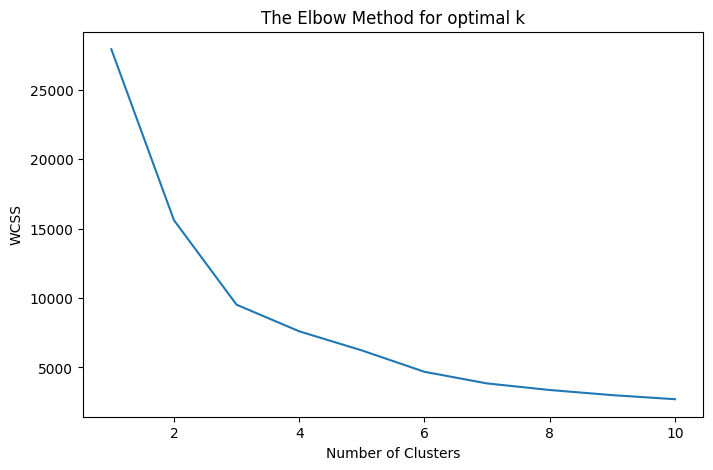

In [27]:
from sklearn.cluster import KMeans

# Finding optimal number of clusters using Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method for optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [28]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_pca)

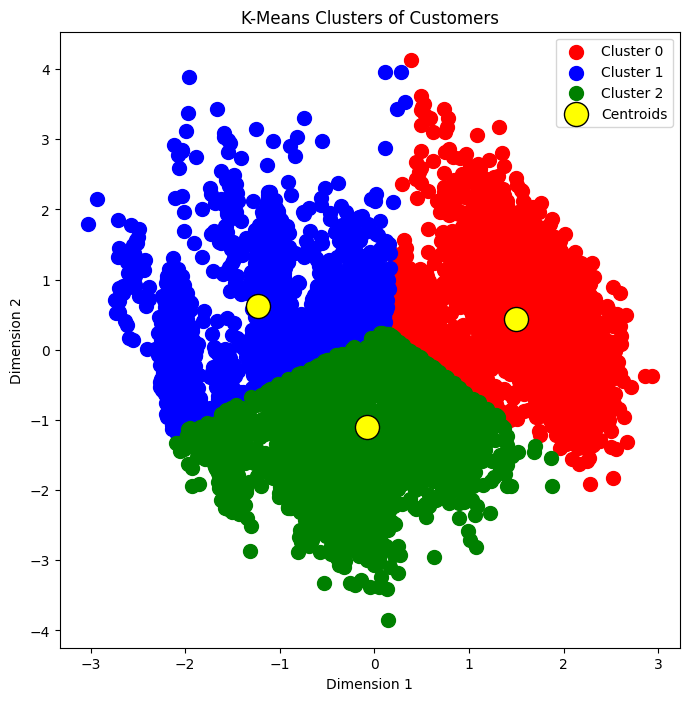

In [29]:
# Visualizing the clusters
plt.figure(figsize=(8, 8))

plt.scatter(X_pca[y_kmeans == 0, 0], X_pca[y_kmeans == 0, 1], s=100, c='red', label='Cluster 0')
plt.scatter(X_pca[y_kmeans == 1, 0], X_pca[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 1')
plt.scatter(X_pca[y_kmeans == 2, 0], X_pca[y_kmeans == 2, 1], s=100, c='green', label='Cluster 2')

# Plot cluster centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', label='Centroids', edgecolors='black')

plt.title('K-Means Clusters of Customers')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

In [30]:
#Calculating silhouette score
from sklearn.metrics import silhouette_score

# Compute silhouette score
silhouette_avg = silhouette_score(X_pca, y_kmeans)
print(f'Silhouette Score: {silhouette_avg:.4f}')

Silhouette Score: 0.4279


In [31]:
from sklearn.metrics import davies_bouldin_score

# Compute Davies-Bouldin Score
db_score = davies_bouldin_score(X_pca, y_kmeans)
print(f'Davies-Bouldin Score: {db_score:.4f}')

Davies-Bouldin Score: 0.8336


# HIERARCHICAL CLUSTERING

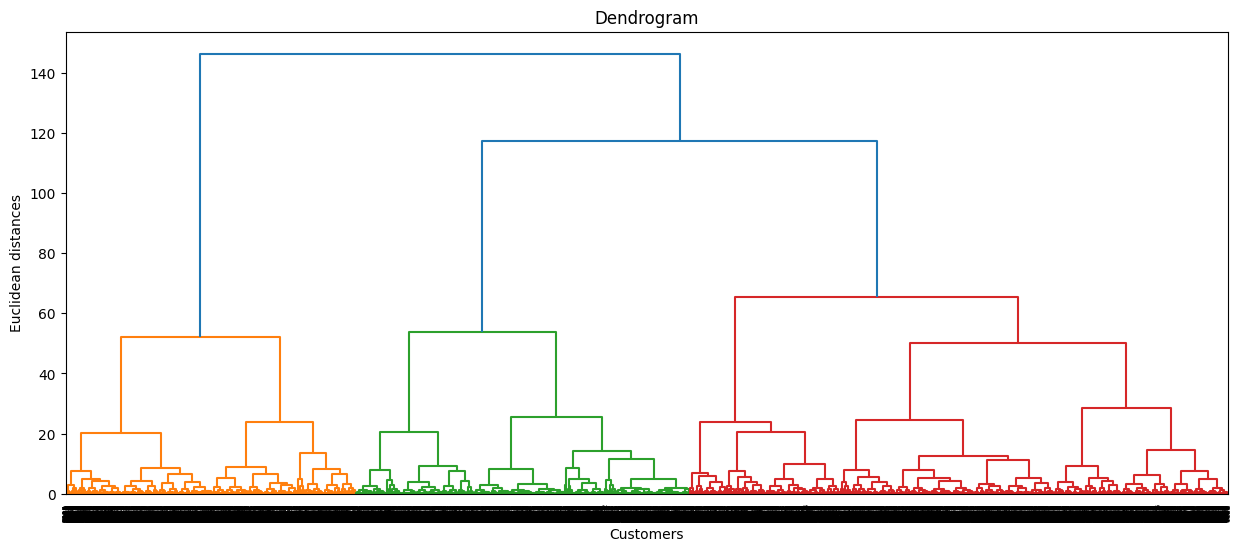

In [32]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,6))
dendrogram = sch.dendrogram(sch.linkage(X_pca, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [33]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X_pca)

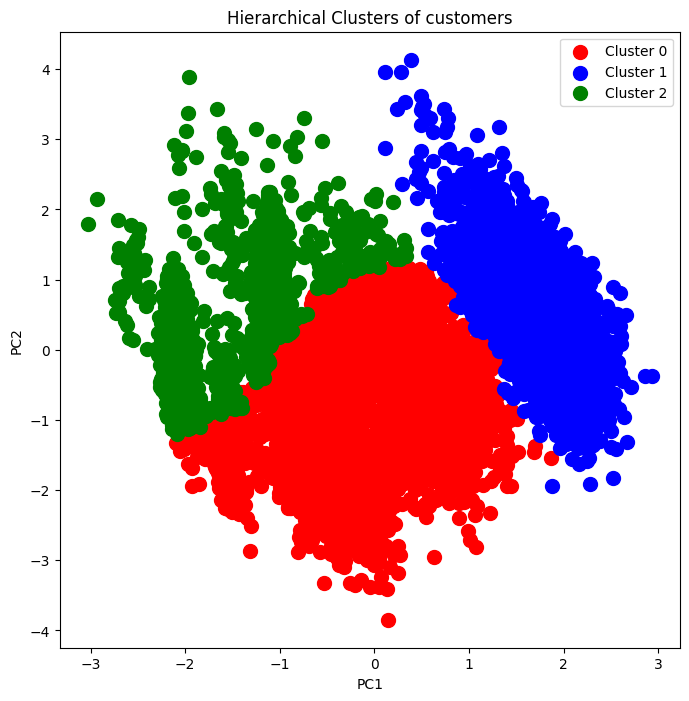

In [34]:
# Visualising the clusters
plt.figure(figsize=(8,8))
plt.scatter(X_pca[y_hc == 0, 0], X_pca[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(X_pca[y_hc == 1, 0], X_pca[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X_pca[y_hc == 2, 0], X_pca[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 2')

plt.title('Hierarchical Clusters of customers')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [35]:
#calculating silhouette score
silhouette_avg = silhouette_score(X_pca, y_hc)
print(f'Silhouette Score: {silhouette_avg:.4f}')

Silhouette Score: 0.4007


In [36]:
# Compute Davies-Bouldin Score
db_score = davies_bouldin_score(X_pca, y_hc)
print(f'Davies-Bouldin Score: {db_score:.4f}')

Davies-Bouldin Score: 0.8984


# ANALYSIS AFTER CLUSTERING

In [37]:
# Add cluster labels to the original dataframe
bank_data2["Cluster"] = y_kmeans  # y_kmeans contains the cluster labels

# View the first few rows with the cluster labels
bank_data2.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Cluster
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,2
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,2
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,0
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,2
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,2


In [38]:
#View sample records in cluster 0
cluster_0 = bank_data2[bank_data2["Cluster"] == 0]
cluster_0.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Cluster
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,0
15,16,15643966,Goforth,616,Germany,Male,45,3,143129.41,2,0,1,64327.26,0,0


In [39]:
#View sample records in cluster 1
cluster_1 = bank_data2[bank_data2["Cluster"] == 1]
cluster_1.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Cluster
2,3,15619304,Onio,502,France,Female,42,8,159660.8,3,1,0,113931.57,1,1
3,4,15701354,Boni,699,France,Female,39,1,0.0,2,0,0,93826.63,0,1


In [40]:
#View sample records in cluster 2
cluster_2 = bank_data2[bank_data2["Cluster"] == 2]
cluster_2.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Cluster
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,2


In [41]:
cluster_0.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Cluster
count,3135.000000,3.135000e+03,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.0
mean,4982.974801,1.569106e+07,651.079107,38.842743,5.134928,123835.569289,1.474322,0.738756,0.422967,104553.455847,0.295375,0.0
std,2910.202455,7.261501e+04,98.371469,10.134064,2.926450,28007.697229,0.589659,0.439383,0.494109,57780.885463,0.456284,0.0
min,8.000000,1.556578e+07,350.000000,18.000000,0.000000,32197.640000,1.000000,0.000000,0.000000,11.580000,0.000000,0.0
25%,2434.500000,1.562901e+07,584.000000,32.000000,3.000000,105323.765000,1.000000,0.000000,0.000000,54513.165000,0.000000,0.0
50%,4939.000000,1.569096e+07,651.000000,38.000000,5.000000,123770.460000,1.000000,1.000000,0.000000,105525.360000,0.000000,0.0
75%,7514.500000,1.575565e+07,721.000000,44.000000,8.000000,142117.895000,2.000000,1.000000,1.000000,155002.385000,1.000000,0.0
max,10000.000000,1.581566e+07,850.000000,84.000000,10.000000,214346.960000,4.000000,1.000000,1.000000,199970.740000,1.000000,0.0


In [42]:
cluster_1.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Cluster
count,3582.000000,3.582000e+03,3582.000000,3582.000000,3582.000000,3582.000000,3582.000000,3582.000000,3582.000000,3582.000000,3582.000000,3582.0
mean,5045.452261,1.569188e+07,649.852596,36.719430,5.298157,14920.823992,1.953657,0.737856,0.471245,101621.758777,0.121999,1.0
std,2880.550063,7.143052e+04,95.802153,9.139446,2.830084,37271.993302,0.454063,0.439862,0.499242,57623.422274,0.327330,0.0
min,3.000000,1.556581e+07,358.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000,0.000000,1.0
25%,2550.250000,1.562979e+07,583.000000,31.000000,3.000000,0.000000,2.000000,0.000000,0.000000,52730.950000,0.000000,1.0
50%,5092.000000,1.569336e+07,651.500000,36.000000,5.000000,0.000000,2.000000,1.000000,0.000000,101591.380000,0.000000,1.0
75%,7543.750000,1.575284e+07,716.000000,41.000000,8.000000,0.000000,2.000000,1.000000,1.000000,151234.622500,0.000000,1.0
max,9996.000000,1.581536e+07,850.000000,85.000000,10.000000,195238.290000,4.000000,1.000000,1.000000,199992.480000,1.000000,1.0


In [43]:
cluster_2.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Cluster
count,3283.000000,3.283000e+03,3283.000000,3283.000000,3283.000000,3283.000000,3283.000000,3283.000000,3283.000000,3283.000000,3283.000000,3283.0
mean,4968.188852,1.568980e+07,650.741090,41.400244,4.584831,98442.885050,1.121535,0.638440,0.650929,94157.226558,0.205300,2.0
std,2871.692110,7.184082e+04,95.945168,11.595615,2.877614,53258.300488,0.328657,0.480525,0.476749,56645.548814,0.403982,0.0
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,123.070000,0.000000,2.0
25%,2502.000000,1.562710e+07,585.000000,33.000000,2.000000,78594.150000,1.000000,0.000000,0.000000,45423.510000,0.000000,2.0
50%,4947.000000,1.568821e+07,654.000000,39.000000,4.000000,110717.380000,1.000000,1.000000,1.000000,90883.120000,0.000000,2.0
75%,7429.000000,1.575178e+07,717.000000,47.000000,7.000000,134208.235000,1.000000,1.000000,1.000000,142070.230000,0.000000,2.0
max,9998.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,3.000000,1.000000,1.000000,199953.330000,1.000000,2.0


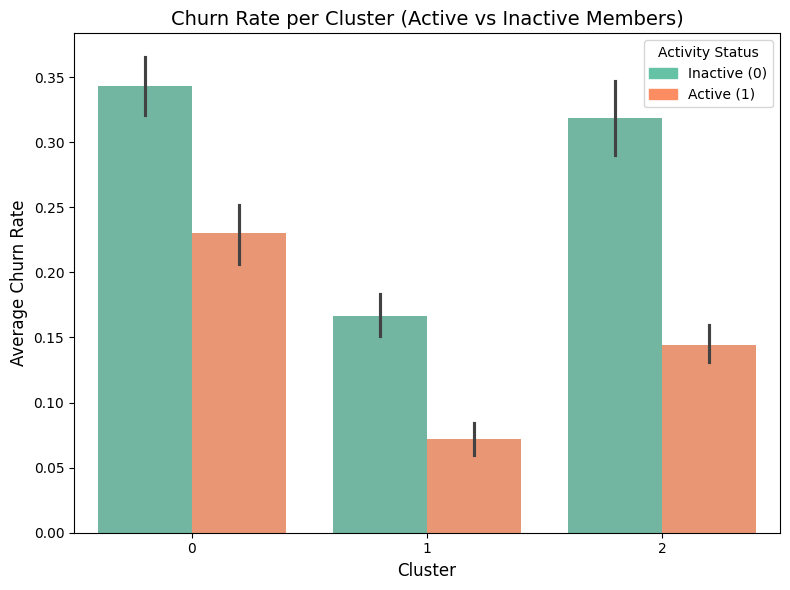

In [44]:
#CHURN RATE PER CLUSTER BASED ON ACTIVITY STATUS
import matplotlib.patches as mpatches

plt.figure(figsize=(8,6))

# Use a clearly distinguishable color palette
palette = sns.color_palette("Set2", n_colors=2)

# Plot the barplot with hue for IsActiveMember
sns.barplot(
    data=bank_data2,
    x="Cluster",
    y="Exited",
    hue="IsActiveMember",
    palette=palette,
    hue_order=[0, 1]
)

# Titles and labels
plt.title("Churn Rate per Cluster (Active vs Inactive Members)", fontsize=14)
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Average Churn Rate", fontsize=12)

# Custom legend with matching colors
inactive_patch = mpatches.Patch(color=palette[0], label="Inactive (0)")
active_patch = mpatches.Patch(color=palette[1], label="Active (1)")
plt.legend(handles=[inactive_patch, active_patch], title="Activity Status")

plt.tight_layout()
plt.show()

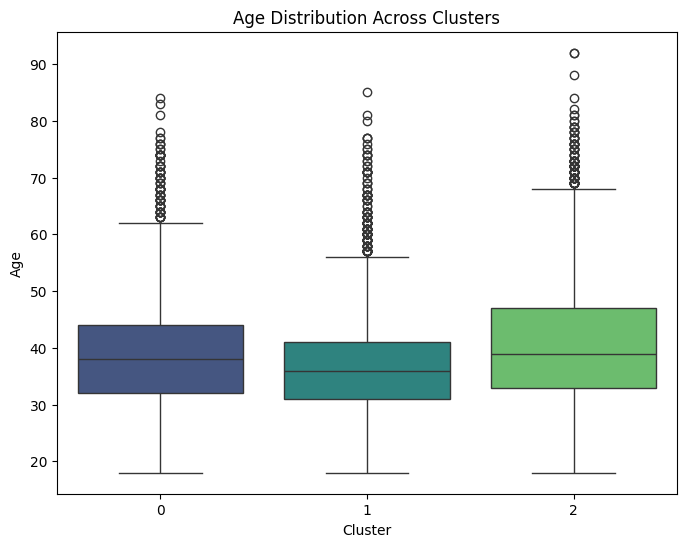

In [45]:
# Box plot to show the distribution of Age per Cluster
plt.figure(figsize=(8,6))

sns.boxplot(data=bank_data2, x="Cluster", y="Age", palette="viridis")

plt.xlabel("Cluster")
plt.ylabel("Age")
plt.title("Age Distribution Across Clusters")
plt.show()

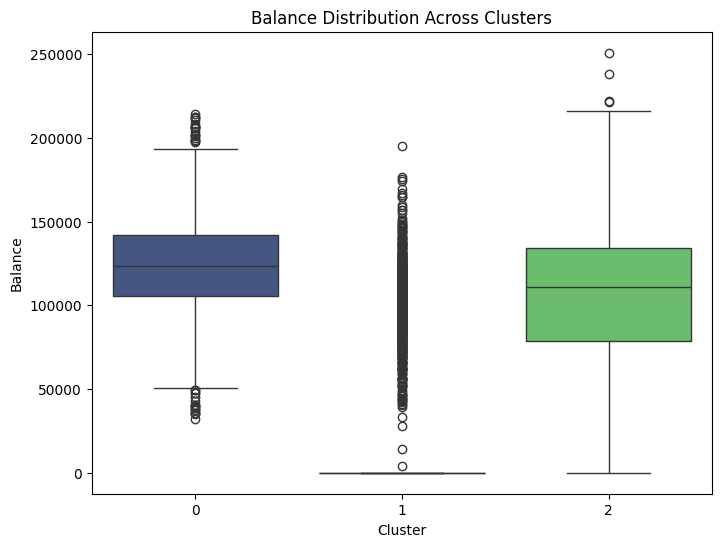

In [46]:
# Box plot for Balance distribution per Cluster
plt.figure(figsize=(8,6))

sns.boxplot(data=bank_data2, x="Cluster", y="Balance", palette="viridis")

plt.xlabel("Cluster")
plt.ylabel("Balance")
plt.title("Balance Distribution Across Clusters")
plt.show()